# Part 1: Case study logistic regression
(see Exercise 4.8.13)

This question should be answered using the Weekly data set, which is part of the `ISLP` package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
# import all needed packages
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
#load the data
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


Here is an explanation of the variables:
- `Year`: The year that the observation was recorded
- `Lag1`: Percentage return for previous week
- `Lag2`: Percentage return for 2 weeks previous
- `Lag3`: Percentage return for 3 weeks previous
- `Lag4`: Percentage return for 4 weeks previous
- `Lag5`: Percentage return for 5 weeks previous
- `Volume`: Volume of shares traded (average number of daily shares traded in billions)
- `Today`: Percentage return for this week
- `Direction`: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.

## Task 1.1
Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [3]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


**Observations**:
- Summary statistics for variable `Lag1` through `Lag5` are almost identical. This is because the `Lag` columns are shifted versions of each other with differences only for the first 5 and the last 5 observations.
- Average return is surprisingly high ($15\%$), but the weekly returns are even more volatile with a standard deviation of $236\
%$.



In [4]:
Weekly['Today'].describe()

count    1089.000000
mean        0.149899
std         2.356927
min       -18.195000
25%        -1.154000
50%         0.241000
75%         1.405000
max        12.026000
Name: Today, dtype: float64

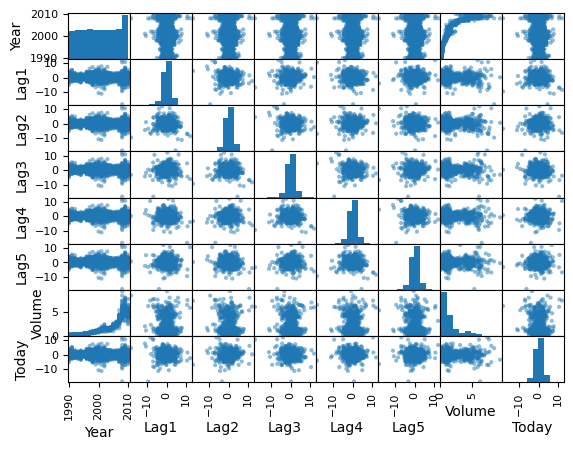

In [5]:
pd.plotting.scatter_matrix(Weekly);

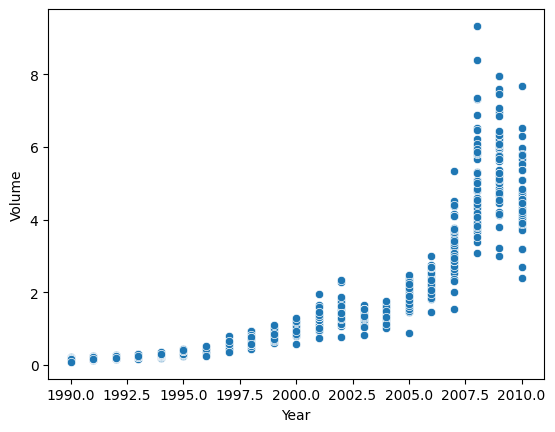

In [6]:
sns.scatterplot(x = Weekly.Year, y = Weekly.Volume);

We observe that the trading volume has been increasing for the years between 1990 and 2010.

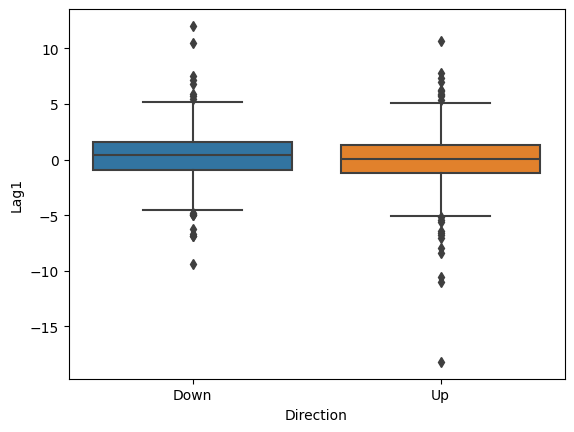

In [7]:
sns.boxplot(data = Weekly, x="Direction", y="Lag1");

There seems not to be a very strong relationship between the `Direction` and the `Lag` variable. If at all, one can say that the return of the week before tends to be higher if the trend in the current week is negative and vice versa.

<Axes: xlabel='Lag1', ylabel='Today'>

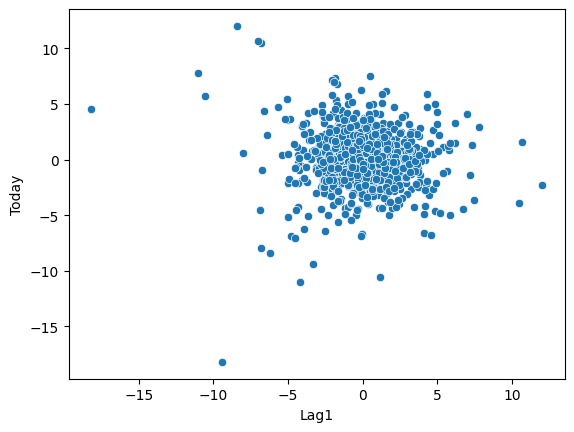

In [8]:
sns.scatterplot(data = Weekly, x = 'Lag1', y = 'Today')

## Task 1.2
Use the full data set to perform a logistic regression with `Direction` as the response and the five `lag` variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

Please refer to the [Section "Logistic Regression" of the Lab of Section 4](https://islp.readthedocs.io/en/latest/labs/Ch04-classification-lab.html#logistic-regression) of our textbook for details on how to implement logistic regression using statsmodels. Here are some additional comments:
- The **design matrix** can be created using `ModelSpec` in the same way as for linear regression.
- The **response vector** `y` needs to contain probabilities, that is numbers between `0` and `1`. Frequently, you need to do some transformation for reaching this. This applies to the example demonstrated in the lab in the textbook in the same way as it does apply to our example. Make sure you understand how the authors of the textbook create their response vector. As a somewhat more universal alternative I recommend [pd.map()]() (click on function name to access the official documentation).
- To create the **logistic regression model**, I recommend using the function [`sm.Logit()`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html) (click on function name to access the official documentation). This leads to a slightly simpler code than using [`sm.GLM()`](https://www.statsmodels.org/stable/glm.html) and setting the flag `family = sm.families.Binomial()` as shown in the sample code in the lab of the textbook.

In [9]:
# build design matrix
predictors = Weekly.columns.drop(['Year', 'Today', 'Direction'])
design = MS(predictors).fit(Weekly)
X = design.transform(Weekly)
X

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...,...
1084,1.0,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,1.0,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.0,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,1.0,0.283,1.281,2.969,-0.861,0.043,4.454044


In [10]:
y = Weekly['Direction'].map(
    {'Up' : 1,
    'Down' : 0}
)
y

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [11]:
from ISLP.models import summarize

model = sm.Logit(y,X)
results = model.fit()
summarize(results)

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


## Task 1.3
Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [12]:
# compute predicted probabilities
predicted_probs = results.predict()
predicted_probs

array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163])

In [13]:
# compute predicted labels
predicted_labels = np.array(['Down']*X.shape[0])
predicted_labels[predicted_probs > 0.5] = "Up"
predicted_labels

array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [14]:
unique_labels, counts = np.unique(predicted_labels, return_counts = True)

In [15]:
counts

array([102, 987])

In [16]:
confusion_table(predicted_labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [17]:
# fraction of correct predictions
np.mean(predicted_labels == Weekly.Direction)

0.5610651974288338

## Task 1.4
Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2`
as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [18]:
# your answer here
training = Weekly[(Weekly.Year <= 2008) & (Weekly.Year >= 1990)]
validation = Weekly[(Weekly.Year >= 2009)]

design = MS(['Lag2']).fit(training)
X_train = design.transform(training)
y_train = training.Direction.map({'Up': 1, 'Down': 0})

In [19]:
display(X_train)
display(y_train)

,intercept,Lag2
0,1.0,1.572
1,1.0,0.816
2,1.0,-0.270
3,1.0,-2.576
4,1.0,3.514
...,...,...
980,1.0,-8.389
981,1.0,12.026
982,1.0,-2.251
983,1.0,0.418


0      0
1      0
2      1
3      1
4      1
      ..
980    0
981    1
982    1
983    0
984    1
Name: Direction, Length: 985, dtype: int64

In [20]:
X_validation = design.transform(validation)

In [21]:
model2 = sm.Logit(y_train, X_train)
results2 = model2.fit()
summarize(results2)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [22]:
predicted_probabilities = results2.predict(X_validation)
predicted_labels = np.array(['Down']*X_validation.shape[0])
predicted_labels[predicted_probabilities > 0.5] = 'Up'
M = confusion_table(predicted_labels, validation.Direction)
M

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [23]:
# fraction of correct predictions
np.mean(predicted_labels == validation.Direction)

0.625

## Task 1.5
Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, transformations, and associated confusion matrix that appears to provide the best results on the held out data.

In [24]:
# your answer here

# Part 2: Multinomial logistic regression
In this part we are going to train a multinomial linear regression model to classify iris species based on the features Sepal Length, Sepal Width, Petal Length and Petal Width.

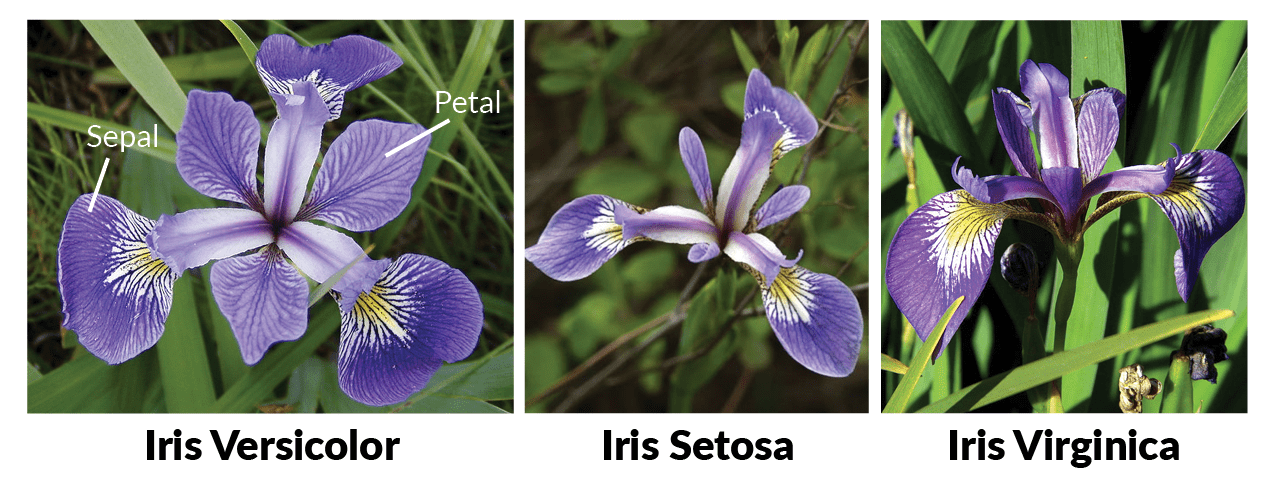

In [25]:
# load data
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [26]:
#create design matrix
predictors = iris.columns.drop('variety')
design = MS(predictors)
X = design.fit_transform(iris)
X

,intercept,sepal.length,sepal.width,petal.length,petal.width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


In [27]:
# create response vector
y = iris['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [28]:
# train logistic regression model
model = sm.MNLogit(y,X)
result = model.fit(method = 'ncg')
result.summary()

Optimization terminated successfully.
         Current function value: 0.039665
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Hessian evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                variety   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.9639
Time:                        05:58:23   Log-Likelihood:                -5.9497
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 7.058e-64
=====================================================================================
variety=Versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             17.8515   1960.461      0.009      0.993   -3824.582    3860.285
sepal.length          -5.7741    477.816     -0.012      0.990    -942.276     930.728
sepal.width           -7.6699    293.230     -0.026      0.979    -582.391     567.051
petal.length          13.1275    556.342      0.024      0.981   -1077.284    1103.539
petal.width            0.0842    865.888   9.72e-05      1.000   -1697.025    1697.193
--------------------------------------------------------------------------------------
variety=Virginica       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           -24.8113   1960.630     -0.013      0.990   -3867.575    3817.953
sepal.length         -8.2381    477.822     -0.017      0.986    -944.752     928.275
sepal.width         -14.3524    293.265     -0.049      0.961    -589.140     560.436
petal.length         22.5591    556.363      0.041      0.968   -1067.892    1113.010
petal.width          18.3772    865.943      0.021      0.983   -1678.839    1715.594
=====================================================================================
"""

In [29]:
# compute fitted values, predicted labels and confusion matrix
fitted = result.predict()
predicted_label = pd.Series(fitted.argmax(axis=1))
predicted_label = predicted_label.map({
    0 : "Setosa",
    1 : "Versicolor",
    2: "Virginica"}
)
M = confusion_table(predicted_label.values,iris.variety)
M

Truth,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,50,0,0
Versicolor,0,49,1
Virginica,0,1,49


In [30]:
# compute accuracy
accuracy = np.mean(predicted_label == iris.variety)
accuracy

0.9866666666666667